In [4]:
import matplotlib.pyplot as plt
import numpy as np
import urllib
import matplotlib.dates as mdates

c:\users\pranav\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The strpdate2num class was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use time.strptime or dateutil.parser.parse or datestr2num instead.
  This is separate from the ipykernel package so we can avoid doing imports until


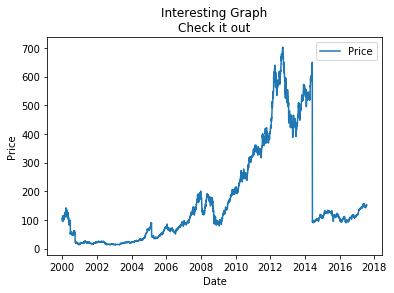

In [10]:
# converting the data into a useable format for packing and unpacking data
def bytespdate2num(fmt, encoding = 'utf-8'):
    strconverter = mdates.strpdate2num(fmt)
    def bytesconverter(b):
        s = b.decode(encoding)
        return strconverter(s)
    return bytesconverter

def graph_data(stock):
    stock_price_url = 'https://pythonprogramming.net/yahoo_finance_replacement'
    source_code = urllib.request.urlopen(stock_price_url).read().decode()
    stock_data = []
    split_source = source_code.split('\n')
    for line in split_source[1:]:
        split_line = line.split(',')
        if len(split_line) == 7:
            if 'values' not in line and 'labels' not in line:
                stock_data.append(line)
    
    date, closep, highp, lowp, openp, adj_closep, volume = np.loadtxt(stock_data,delimiter=',',unpack=True,converters={0: bytespdate2num('%Y-%m-%d')})
      
    plt.plot_date(date, closep, '-', label = 'Price')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.title('Interesting Graph\nCheck it out')
    plt.show()

graph_data('TSLA')
    

 